<a href="https://colab.research.google.com/github/ttoygar/CatsAndDogsTransferLearning/blob/main/Transfer_Learning_Cats_Dogs_MODEL_TRAINING_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pickle
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.applications import ResNet50

In [2]:
DATADIR = "/content/drive/MyDrive/DATASCI/kagglecatsanddogs/PetImages"

with open(os.path.join(DATADIR, "catsndogs.pickle"),"rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_test = data["X_test"]
X_val = data["X_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]

In [3]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(64,64,3),
    pooling='max'
)

94781440/94765736 [==============================] - 0s 0us/step


In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [18]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [19]:
head_model = tf.keras.Model(inputs=base_model.inputs, outputs=predictions)

In [20]:
head_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
history = head_model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=5,
    validation_data=(X_val, y_val)
)

Epoch 1/5
17/69 [======>.......................] - ETA: 4s - loss: nan - accuracy: 0.5030

KeyboardInterrupt: ignored

In [10]:
head_model.evaluate(X_test, y_test)

118/118 [==============================] - 4s 25ms/step - loss: nan - accuracy: 0.4955


[nan, 0.4954666793346405]

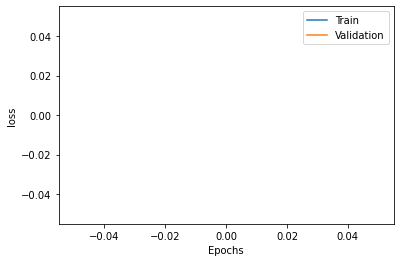

In [11]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")

plt.xlabel("Epochs")
plt.ylabel("loss")

plt.legend()
plt.show()

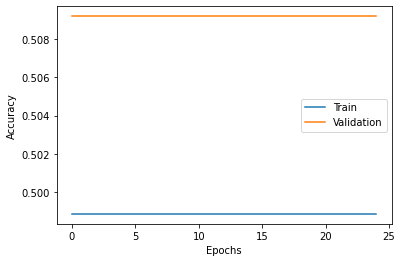

In [12]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [ ]:
with open("model.pickle", "wr") as f:
    pickle.dump(head_model, f)